# BTVN:
# 1: Cho tập dữ liệu đoán bệnh tim bằng hồi quy logistic

# 2 : Ứng dụng thuật toán Kmean cho tập dữ liệu customer data, you can get in kanggle

# 3 : Tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn 
# tổng cộng các bạn sẽ có 3 bài lớn và 4 bài nhỏ cho next homework


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int32  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    float64
 12  Thal       303 non-null    int32  
 13  AHD        303 non-null    int64  
dtypes: float64(2), int32(2), int64(10)
memory usage: 30.9 KB
None
   Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1          3     145   233    1        2    150      0      2.3   
1   67    1          0     160   2

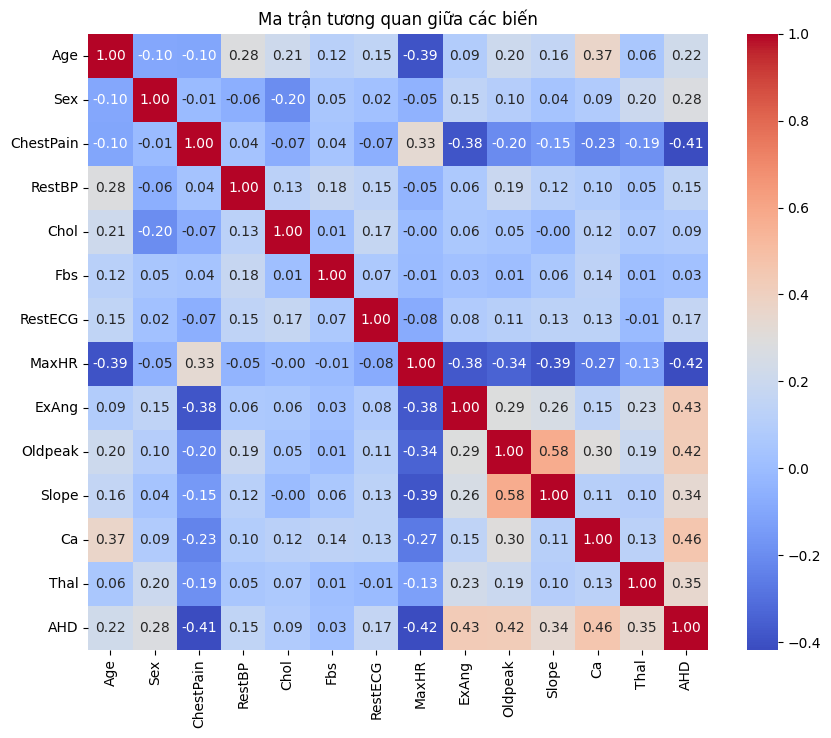

In [8]:
#bài tập về nhà 1 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Đọc dữ liệu
file_path = "Heart.csv"
df = pd.read_csv(file_path)

# Xóa cột không cần thiết nếu có
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

# Chuyển đổi cột mục tiêu 'AHD' thành dạng nhị phân (Yes -> 1, No -> 0)
df["AHD"] = df["AHD"].map({"Yes": 1, "No": 0})

# Chuyển đổi các cột dạng chuỗi thành số bằng LabelEncoder
categorical_cols = ["ChestPain", "Thal"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Xử lý giá trị thiếu bằng cách điền trung vị nếu có
if df.isnull().sum().sum() > 0:
    df.fillna(df.median(), inplace=True)

# Kiểm tra dữ liệu
print(df.info())
print(df.head())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = df.drop(columns=['AHD'])  # Loại bỏ cột mục tiêu
X_scaled = scaler.fit_transform(X)
y = df['AHD']

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy logistic
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()


   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40
Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')


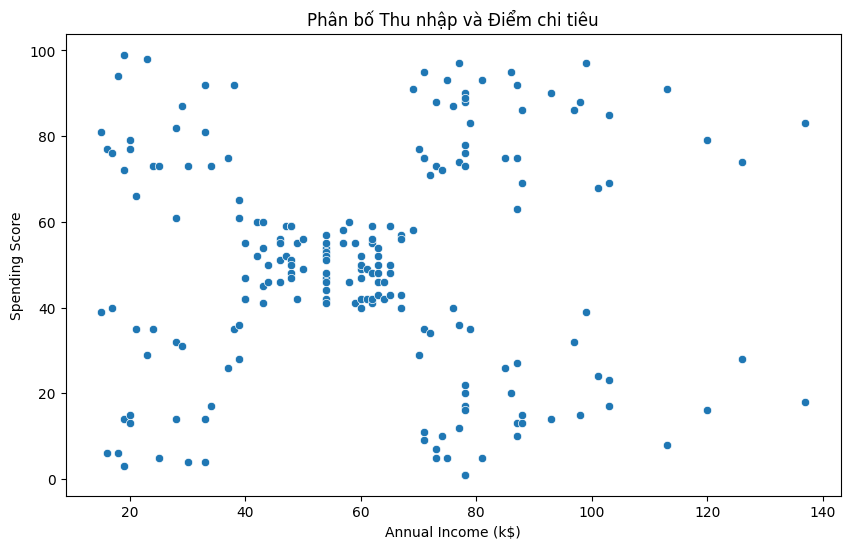

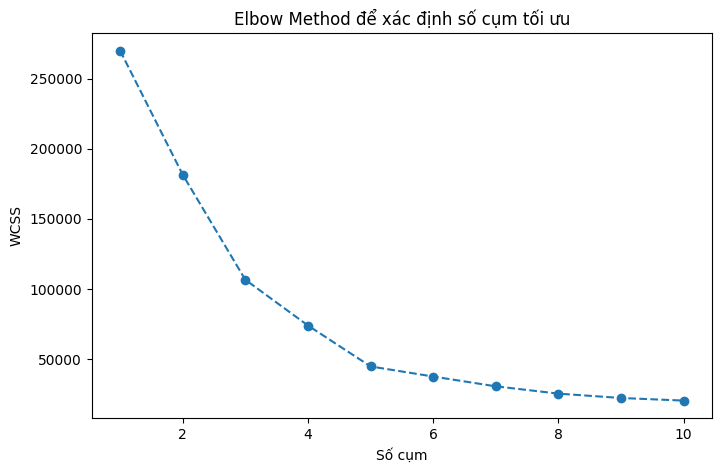

   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score  Cluster
0           1    Male   19                  15              39        4
1           2    Male   21                  15              81        2
2           3  Female   20                  16               6        4
3           4  Female   23                  16              77        2
4           5  Female   31                  17              40        4


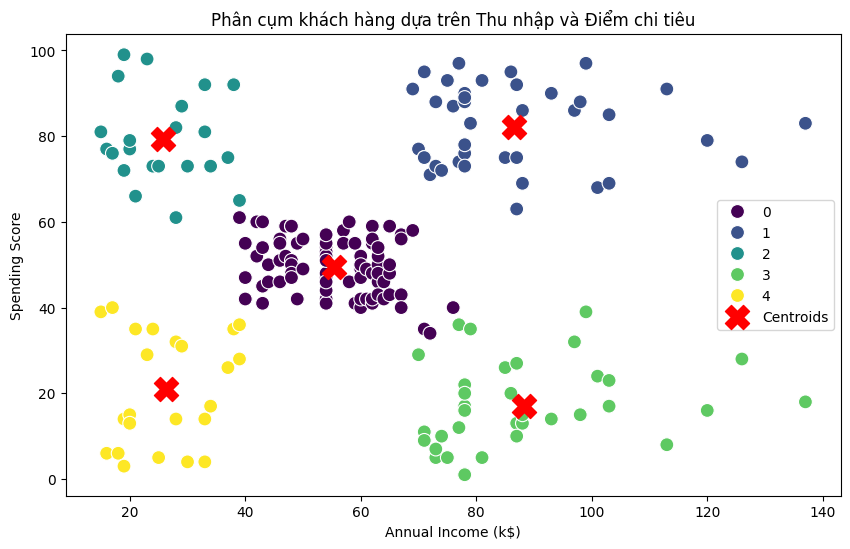

In [9]:
#Bài tập về nhà 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Đọc dữ liệu
file_path = "Mall_Customers.csv"  # Cập nhật đường dẫn nếu cần
data = pd.read_csv(file_path)

# Xem 5 dòng đầu tiên
print(data.head())
print(data.columns)

# Vẽ phân bố thu nhập và điểm chi tiêu
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual_Income_(k$)'], y=data['Spending_Score'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Phân bố Thu nhập và Điểm chi tiêu")
plt.show()

# Chọn hai đặc trưng quan trọng
X = data[['Annual_Income_(k$)', 'Spending_Score']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Số cụm")
plt.ylabel("WCSS")
plt.title("Elbow Method để xác định số cụm tối ưu")
plt.show()

# Áp dụng K-Means với số cụm K=5
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Xem kết quả phân cụm
print(data.head())

# Vẽ phân cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual_Income_(k$)'], y=data['Spending_Score'], hue=data['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Phân cụm khách hàng dựa trên Thu nhập và Điểm chi tiêu")
plt.legend()
plt.show()


#bài tập về nhà 3 
PCA - Kỹ Thuật Giảm Chiều Dữ Liệu
Principal Component Analysis (PCA) là một phương pháp phổ biến trong học máy và thống kê, giúp giảm số lượng biến trong tập dữ liệu mà vẫn giữ lại thông tin quan trọng nhất. PCA hoạt động bằng cách biến đổi dữ liệu sang một không gian mới, trong đó các trục chính (principal components) đại diện cho phương sai lớn nhất của dữ liệu.

Lợi ích của PCA:
Giảm chiều dữ liệu: Giúp giảm số lượng đặc trưng mà vẫn giữ lại phần lớn thông tin, giúp cải thiện hiệu suất thuật toán.
Loại bỏ nhiễu: PCA có thể loại bỏ các đặc trưng không quan trọng hoặc chứa nhiễu, giúp tăng độ chính xác của mô hình.
Giải quyết đa cộng tuyến: Giảm sự phụ thuộc tuyến tính giữa các biến, giúp mô hình ổn định hơn.
Trực quan hóa dữ liệu: PCA giúp biểu diễn dữ liệu nhiều chiều trong không gian 2D hoặc 3D, hỗ trợ việc phân tích và hiểu rõ hơn về cấu trúc dữ liệu.

In [10]:
#sử dụng data iris để phân cụm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = datasets.load_iris()
x=iris.data #có 4 đặc trưng
y=iris.target #nhấn để so sánh


#Áp dụng KMEAN với sô cụm là 3 
KMeans=KMeans(n_clusters=3 , random_state=42)
KMeans.fit(X)
y_Kmeans = KMeans.predict(X)


#Sử dụng PCA để giảm chiều (Về nhà giải thích cho tôi ở bài tập về nhà )
pca= PCA(n_components=2)#Giảm xuống còn 2 chiều
X_pca=pca.fit_transform(X)
#Trực quan hoá kết quả


 Accuracy: 0.9650

 Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.94      0.95        54
      benign       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



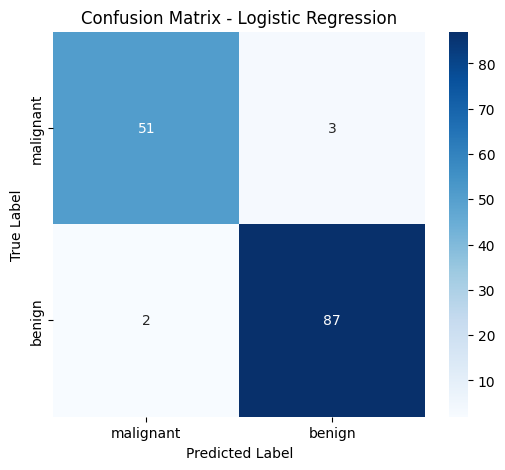

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = load_breast_cancer()
X = data.data  
y = data.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LogisticRegression(max_iter=5000)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Lab 4 - một số thuật toán cơ bản của học máy 
1. LINEAR  REGERSSION 
# Biết : Hồi quy tuyến tính là dự đoán giá trị liên tục qua trên một hoặc nhiều biến độc lập

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = """
6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166
5.7107,3.2522
14.164,15.505
5.734,3.1551
8.4084,7.2258
5.6407,0.71618
5.3794,3.5129
6.3654,5.3048
5.1301,0.56077
6.4296,3.6518
7.0708,5.3893
6.1891,3.1386
20.27,21.767
5.4901,4.263
6.3261,5.1875
5.5649,3.0825
18.945,22.638
12.828,13.501
10.957,7.0467
13.176,14.692
22.203,24.147
5.2524,-1.22
6.5894,5.9966
9.2482,12.134
5.8918,1.8495
8.2111,6.5426
7.9334,4.5623
8.0959,4.1164
5.6063,3.3928
12.836,10.117
6.3534,5.4974
5.4069,0.55657
6.8825,3.9115
11.708,5.3854
5.7737,2.4406
7.8247,6.7318
7.0931,1.0463
5.0702,5.1337
5.8014,1.844
11.7,8.0043
5.5416,1.0179
7.5402,6.7504
5.3077,1.8396
7.4239,4.2885
7.6031,4.9981
6.3328,1.4233
6.3589,-1.4211
6.2742,2.4756
5.6397,4.6042
9.3102,3.9624
9.4536,5.4141
8.8254,5.1694
5.1793,-0.74279
21.279,17.929
14.908,12.054
18.959,17.054
7.2182,4.8852
8.2951,5.7442
10.236,7.7754
5.4994,1.0173
20.341,20.992
10.136,6.6799
7.3345,4.0259
6.0062,1.2784
7.2259,3.3411
5.0269,-2.6807
6.5479,0.29678
7.5386,3.8845
5.0365,5.7014
10.274,6.7526
5.1077,2.0576
5.7292,0.47953
5.1884,0.20421
6.3557,0.67861
9.7687,7.5435
6.5159,5.3436
8.5172,4.2415
9.1802,6.7981
6.002,0.92695
5.5204,0.152
5.0594,2.8214
5.7077,1.8451
7.6366,4.2959
5.8707,7.2029
5.3054,1.9869
8.2934,0.14454
13.394,9.0551
5.4369,0.61705
"""
from io import StringIO
df = pd.read_csv(StringIO(data), header=None, names=["X", "y"])

X = df[["X"]]
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) 
y_line = model.predict(X_range)

plt.scatter(X, y, label="Actual Data", color="blue", alpha=0.5)

plt.plot(X_range, y_line, label="Prediction", color="green", linewidth=2)

plt.xlabel("X - Input Feature")
plt.ylabel("y - Target Value")
plt.title("Linear Regression Fit")
plt.legend()

plt.show()

In [ ]:
# sử dungjn hồi quy tuyến tính để dự đoán giá nhà thông quá bộ dữ liệu fetch califonia

import numpy as np
import pandas as pd  # Đúng: pd là alias cho pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


cali=fetch_california_housing()
x = pd.DataFrame(cali.data, columns=cali.feature_names)  # Sai: 'Dataframe' và 'colums'
y=pd.Series(cali.target)


# Chia tập dữ liệu có 80% huấn luyện và 20% kiểm tra
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Xây dựng và huấn luyện mô hình 
model=LinearRegression()
model.fit(x_train,y_train)


#Dự đoán và đánh giá 
y_pred = model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

#Vẽ biểu đồ 
plt.scatter(y_test,y_pred)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán ")
plt.title("Biểu đồ dự đoán Cali")
plt.show()